In [21]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
# Concat conbines the Dataframes by rows (axis=0) or columns (axis=1)
# example1. 
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [23]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [24]:
# concatenate the two DataFrames 
job_postings = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)
job_postings

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


In [25]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

In [ ]:
#now in our dataframe we will make dataframe for each month using a loop
months = df['job_posted_month'].unique()

# Create a dictionary to hold DataFrames for each month
dict_months = {month: df[df['job_posted_month'] == month] for month in months}

In [27]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


In [28]:
# concatenate the first quarter months
df_Q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)
df_Q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


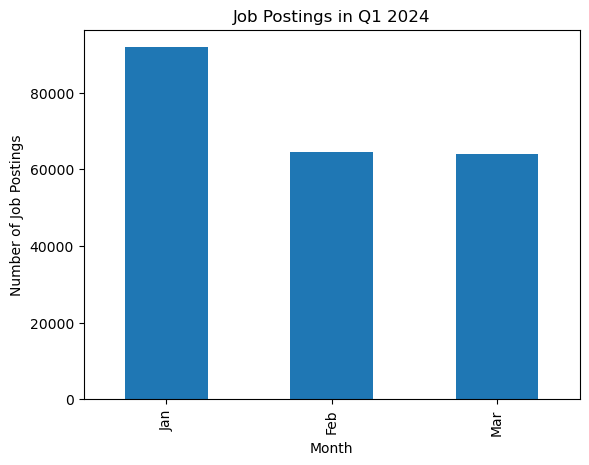

In [29]:
df_Q1['job_posted_month'].value_counts().plot(kind='bar')
plt.title('Job Postings in Q1 2024')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(ticks=range(len(df_Q1['job_posted_month'].value_counts().index)), labels=df_Q1['job_posted_month'].value_counts().index)
plt.show()

In [30]:
df_Q2 = pd.concat([dict_months['Apr'], dict_months['May'], dict_months['Jun']], ignore_index=True)
df_Q2

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",Apr
1,Data Engineer,Erfahrene*r Data Engineer*in (m/w/d),"Basel, Switzerland",via LinkedIn,Full-time,False,Switzerland,2023-04-17 13:27:32,True,False,Switzerland,None,NaN,NaN,ROCKEN®,"['python', 'databricks', 'azure', 'spark']","{'cloud': ['databricks', 'azure'], 'libraries'...",Apr
2,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",Apr
3,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None,Apr
4,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"['python', 'java', 'scala']","{'programming': ['python', 'java', 'scala']}",Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176590,Data Scientist,Practicante Científico de Datos,Peru,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Peru,2023-06-29 07:09:12,False,False,Peru,None,NaN,NaN,Byte,"['python', 'sql', 'airflow', 'docker']","{'libraries': ['airflow'], 'other': ['docker']...",Jun
176591,Data Analyst,Credits Monitoring and Reporting Analytics Spe...,Türkiye,via Trabajo.org,Full-time,False,Turkey,2023-06-10 06:33:28,False,False,Turkey,None,NaN,NaN,NBS İnsan Kaynakları,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Jun
176592,Data Analyst,Data Analyst,"Lisbon, Portugal",via Empregos Trabajo.org,Full-time,False,Portugal,2023-06-28 06:51:12,True,False,Portugal,None,NaN,NaN,Onrising,"['sql', 'excel', 'power bi']","{'analyst_tools': ['excel', 'power bi'], 'prog...",Jun
176593,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,"['python', 'aws', 'gcp', 'azure', 'tensorflow'...","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",Jun


Text(0, 0.5, 'Number of Job Postings')

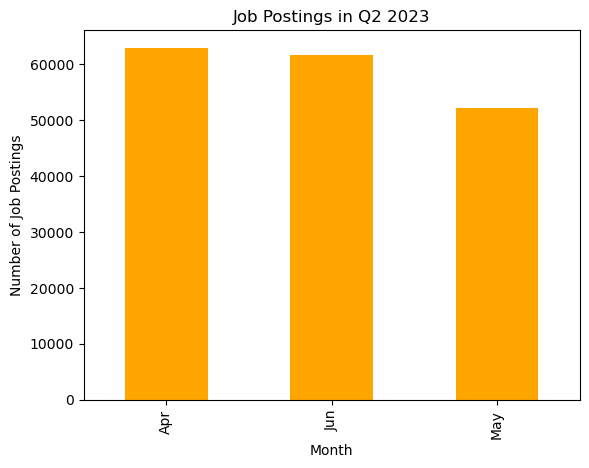

In [31]:
df_Q2['job_posted_month'].value_counts().plot(kind='bar', color='orange')
plt.title('Job Postings in Q2 2023')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')    